In [91]:
import graph_tool.all as gt
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import pickle
import datetime
import glob
import re
import numpy as np
plt.rcParams['figure.dpi'] = 300
random.seed(2022)
gt.openmp_set_schedule("auto")

In [96]:
data_dir = "data/"
experiment_dir = "experiment/"
data_filenames = ["mouse_vc","ecoli2k","yeast8k","bc","fbego2","pydep2"]
data_filenames_big = ["bc","fbego2","pydep2"]
names = ["Mouse","E. Coli", "Yeast", "Bitcoin", "Facebook","Python"]
shuffle_names = ["erdos","configuration"]

In [93]:
def motif_list_contains(motif_list:list, subgraph:gt.Graph()):
    for (i,motif) in enumerate(motif_list):
        if gt.isomorphism(motif,subgraph):
            return i
    return -1

## Load Results

In [94]:
root = f"./{experiment_dir}"
theglob = glob.iglob(pathname="*.pickle",root_dir=root)
names_or = "|".join(data_filenames)
k_pattern = "-[0-9]-"
shuffles_or = "|".join(shuffle_names)
und_pattern = "(-UND)"
count_pattern = "(-COUNT)"

big_map = dict()
big_map_erdos = dict()
for name in data_filenames:
    big_map[name] = dict()
    big_map_erdos[name] = dict()
for result in theglob:
    dataset = re.search(pattern=names_or,string= result).group(0)
    k = re.search(pattern=k_pattern,string= result).group(0).replace("-","")
    shuffle_model = re.search(pattern=shuffles_or,string= result).group(0)
    undirected = True if re.search(pattern=und_pattern,string= result) is not None else False
    count_only = True if re.search(pattern=count_pattern,string= result) is not None else False
    res = None
    with open(root+"/"+result,'rb') as f:
        res = pickle.load(f)
    obj:dict = big_map[dataset] if shuffle_model != "erdos" else big_map_erdos[dataset]
    if obj == None:
        print("Big Problem")
        break
    tag = "directed" if not undirected else "undirected"
    if count_only:
        tag = "count"
    kdict = obj.get(k)
    if kdict is None:
        b = dict()
        b["results"] = res[1]
        b["motifs"] = res[0]
        c = dict()
        c[tag] = b
        obj[k] = c
    else:
        tagdict = kdict.get(tag)
        if tagdict is None:
            b = dict()
            b["results"] = res[1]
            b["motifs"] = res[0]
            kdict[tag] = b
        else:
            kdict[tag]["results"] = res[1]
            kdict[tag]["motifs"] = res[0]

### Experiment results
- Create global motif list for consistent plotting
- Plot results for fixed parameters


### Directed Motifs of Size 3

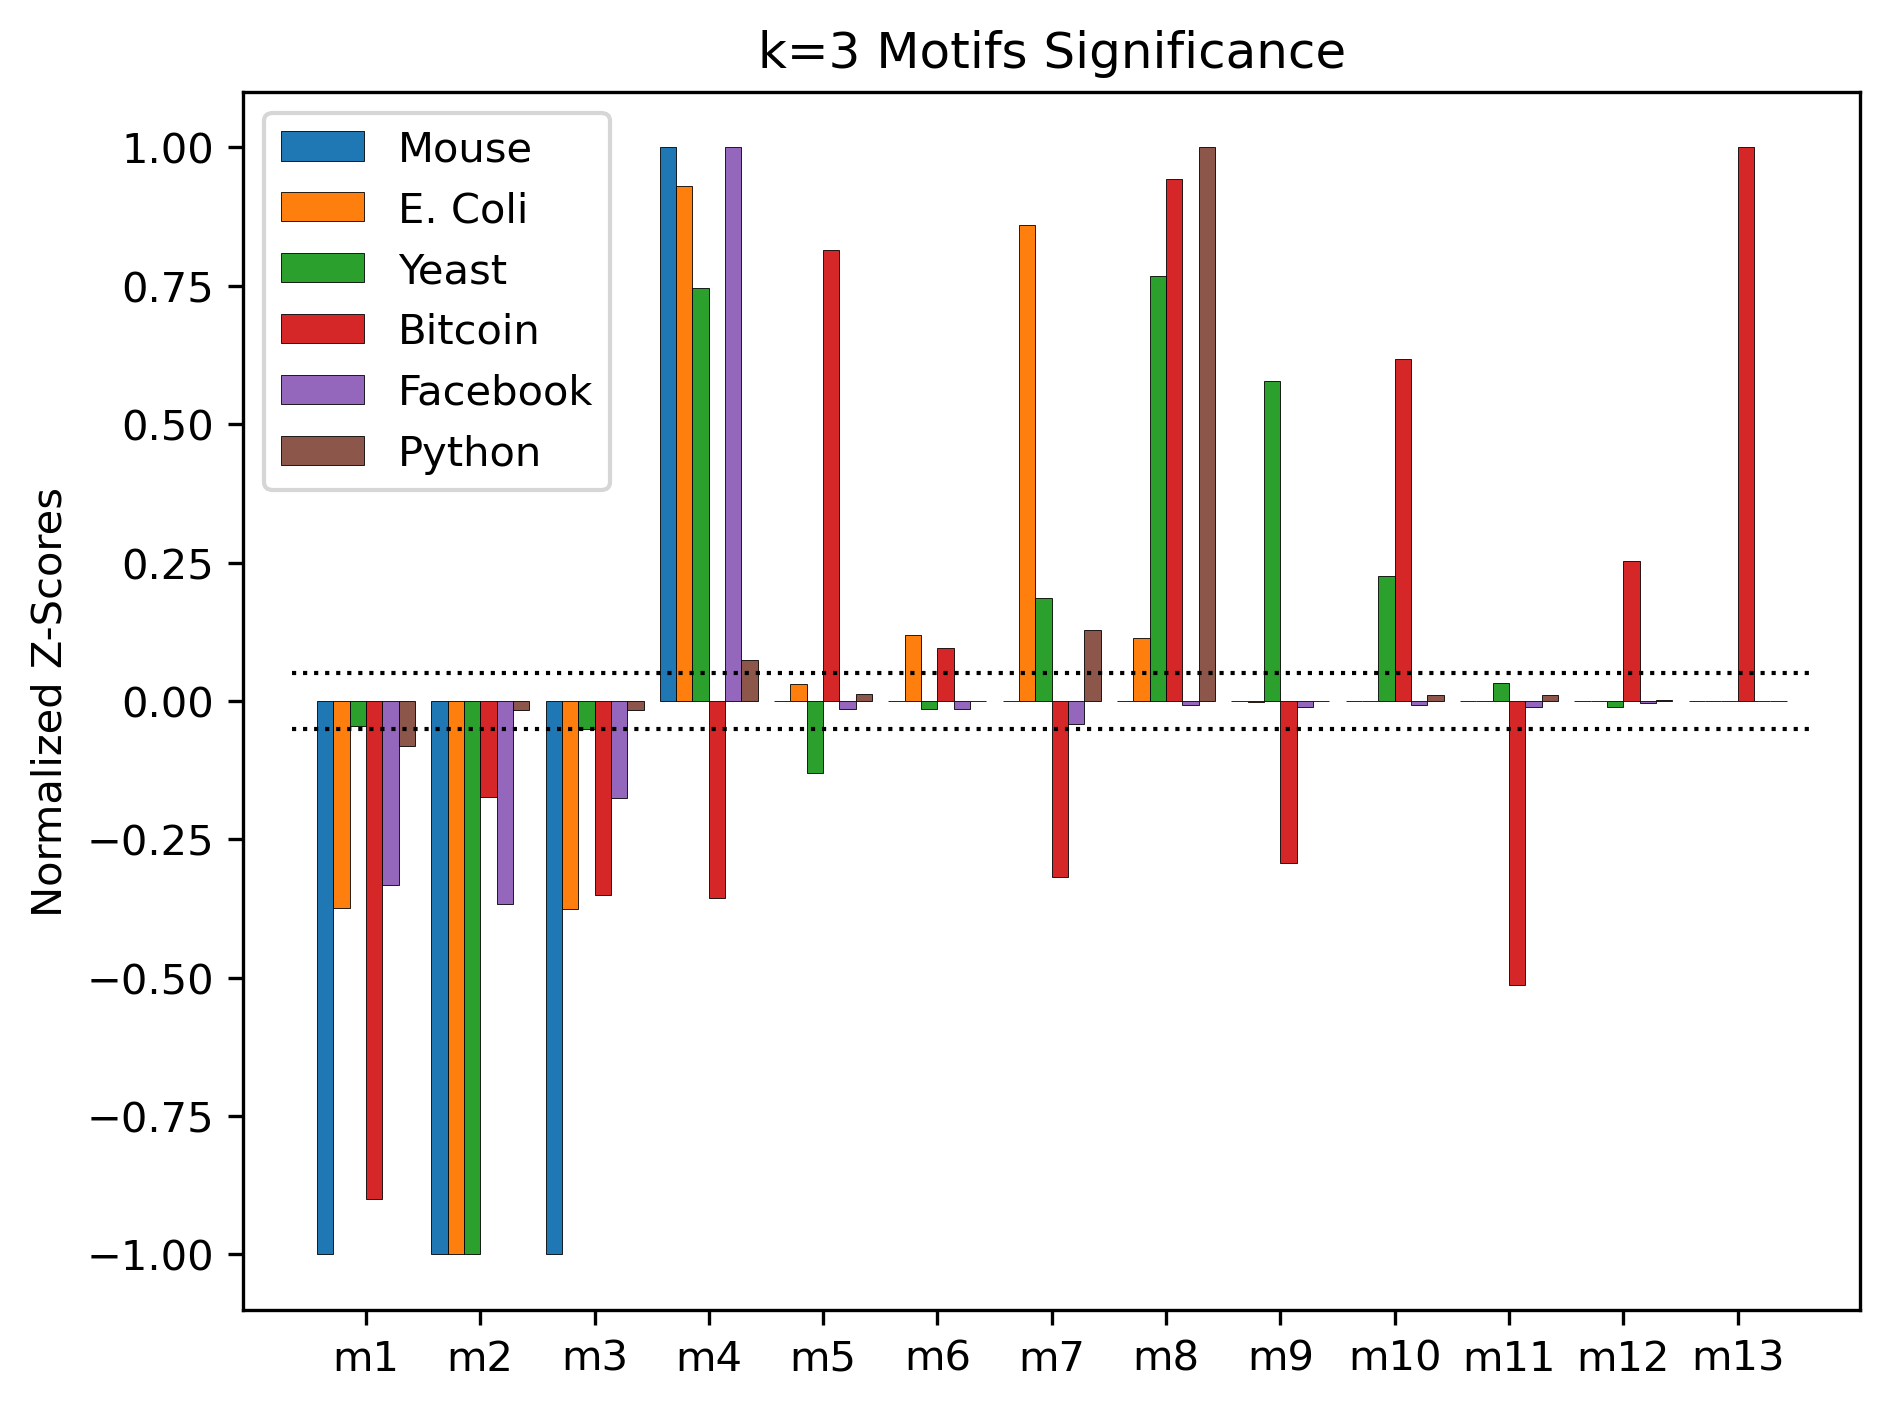

In [89]:
# DIRECTED MOTIFS OF SIZE 3 - CONFIGURATION
k_motif_size = 3
k_key = "3"
tag = "directed"

global_list = list()
max_list = list()
max_size = 0
max_name = ""
# FIND BIGGER MOTIF LIST
for a_dataset in data_filenames:
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_size = len(curr_list)
    if curr_size > max_size:
        max_list = curr_list
        max_name = a_dataset
        max_size = curr_size
global_list = max_list
# ADD MISSING IF ANY
for a_dataset in data_filenames:
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    for a_motif in curr_list:
        if motif_list_contains(global_list,a_motif) < 0:
            print(f"found missing motif from {a_dataset}")
            global_list.append(a_motif)

# EXPAND RESULTS AND PLOT
normalize = True

n = np.arange(len(global_list))
labels = list()
for i in range(1,len(global_list)+1):
    labels += [f"m{i}"]
fig, ax = plt.subplots()
n_bars = len(data_filenames)
width = 1.0/(n_bars+1)
off = 0 - (width*(n_bars-1)/2)
for (a_dataset,a_name) in zip(data_filenames,names):
    exp_results = [0] * len(global_list)
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]
    exp_labels = [0] * len(global_list)
    max_val = 0
    for b in curr_results:
        if abs(b) > max_val:
            max_val = abs(b)
    for j in range(0,len(curr_list)):
        global_index = motif_list_contains(global_list,curr_list[j])
        if normalize:
            exp_results[global_index] = curr_results[j]/max_val if max_val > 1 else curr_results[j]
        else:
            exp_results[global_index] = curr_results[j]
        exp_labels[global_index] = curr_results[j]
    r = ax.bar(n+off,exp_results,align="center",width=width,edgecolor="black",linewidth=0.2,label=a_name)
    off = off + width
ax.set_ylabel('Normalized Z-Scores')
ax.set_title('k=3 Motifs Significance')
ax.set_xticks(n, labels)
ax.axhline(y=0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.axhline(y=-0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.legend()
fig.tight_layout()
plt.show()
for g,mane in zip(global_list,n):
    gt.graph_draw(g,output_size=(200,200),bg_color="white",output=f"./configuration_dir_3//m{mane+1}.png")

In [81]:
global_list_config = global_list

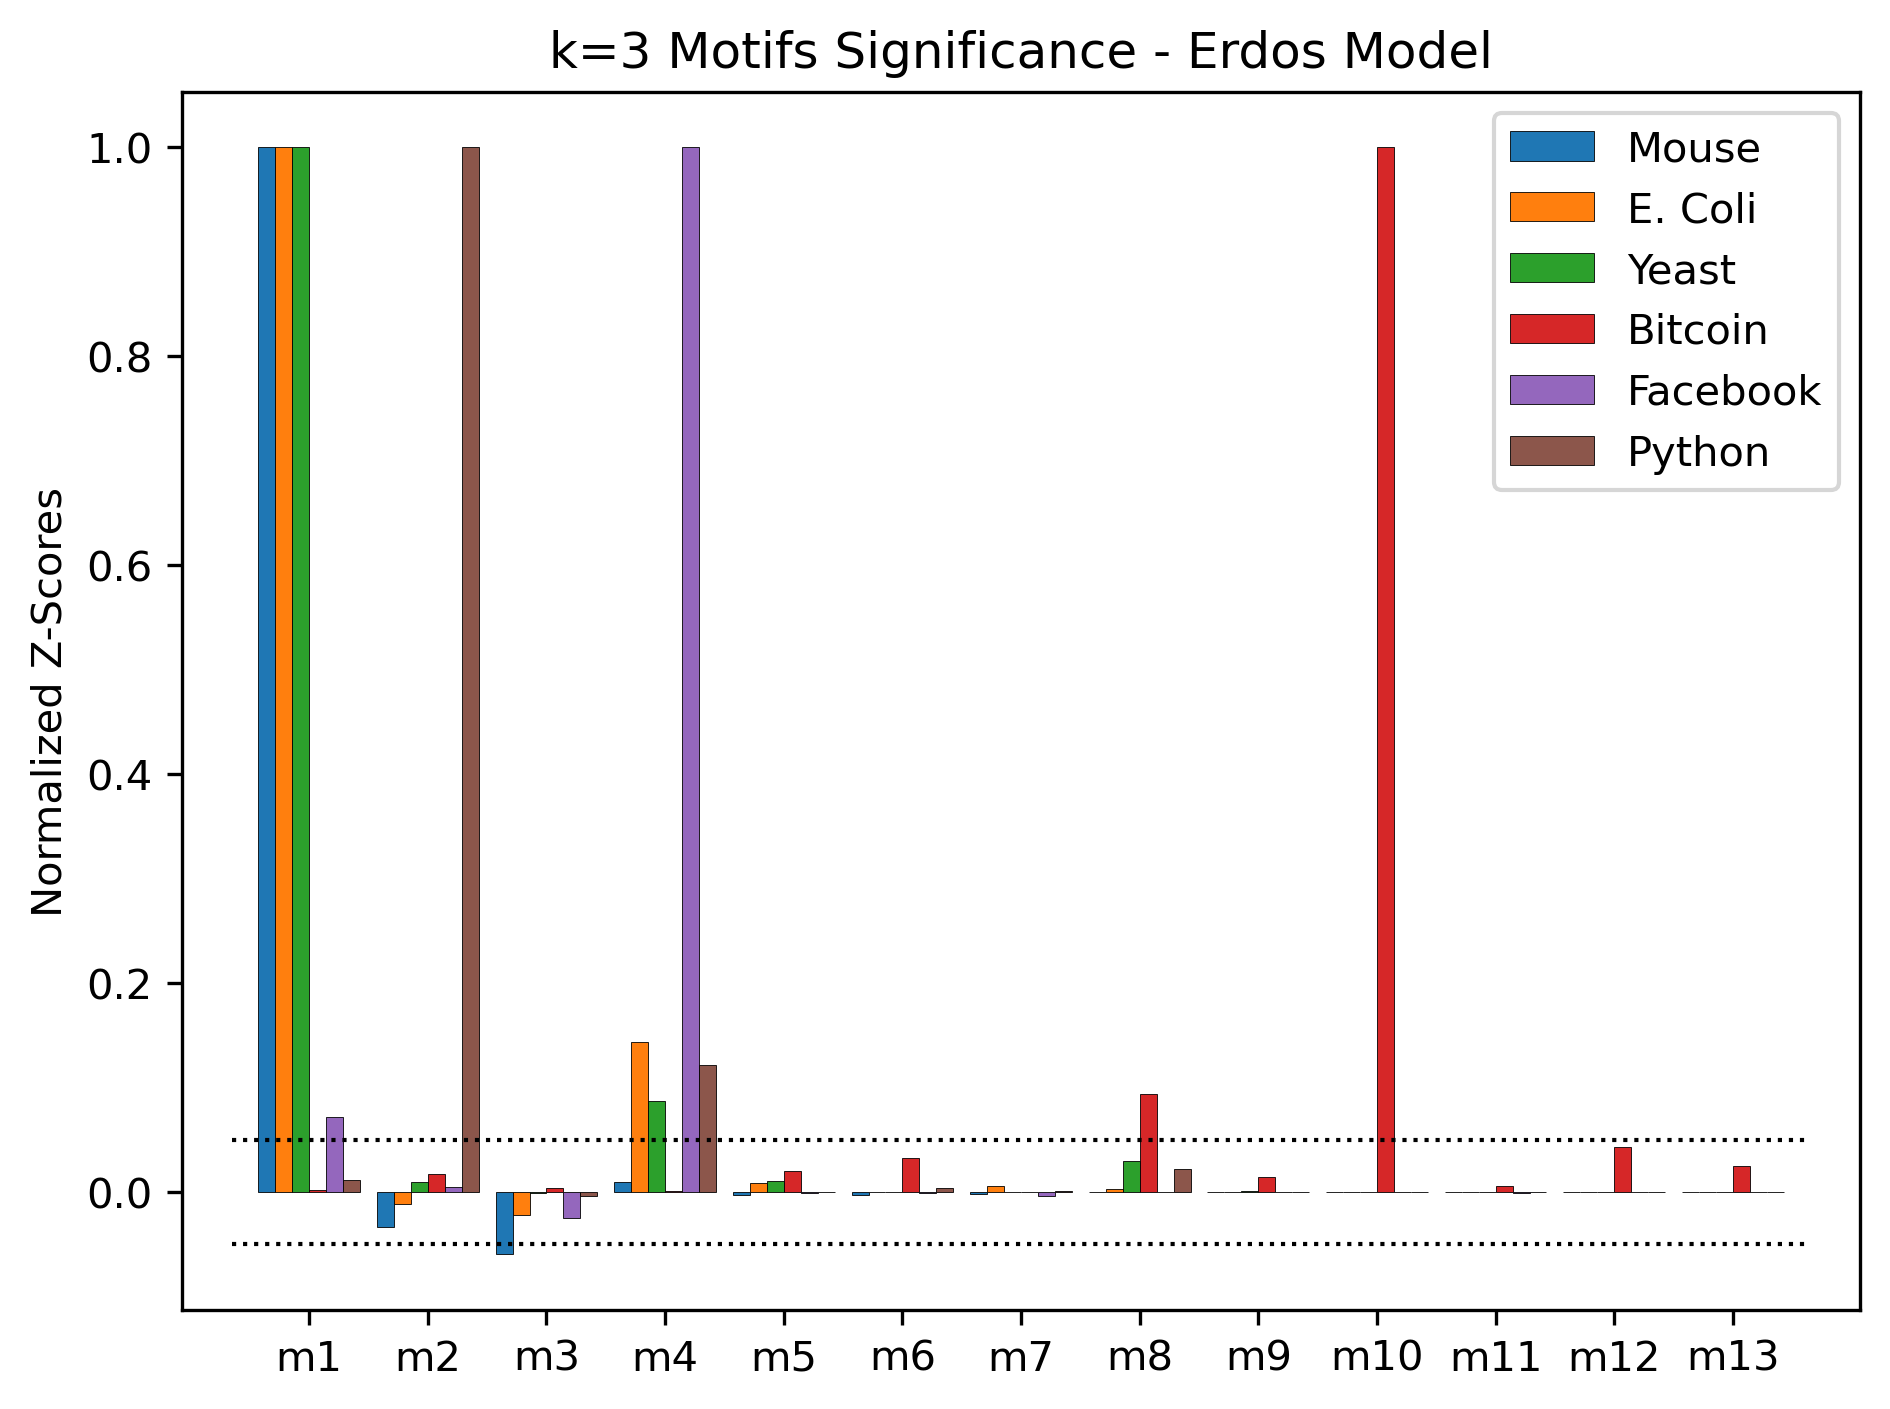

In [90]:
# DIRECTED MOTIFS OF SIZE 3 - ERDOS
k_motif_size = 3
k_key = "3"
tag = "directed"

global_list = list()
max_list = list()
max_size = 0
max_name = ""
# FIND BIGGER MOTIF LIST
for a_dataset in data_filenames:
    curr_list = big_map_erdos[a_dataset][k_key][tag]["motifs"]
    curr_size = len(curr_list)
    if curr_size > max_size:
        max_list = curr_list
        max_name = a_dataset
        max_size = curr_size
global_list = max_list
# ADD MISSING IF ANY
for a_dataset in data_filenames:
    curr_list = big_map_erdos[a_dataset][k_key][tag]["motifs"]
    for a_motif in curr_list:
        if motif_list_contains(global_list,a_motif) < 0:
            print(f"found missing motif from {a_dataset}")
            global_list.append(a_motif)

# EXPAND RESULTS AND PLOT
normalize = True
global_list = global_list_config
n = np.arange(len(global_list))
labels = list()
for i in range(1,len(global_list)+1):
    labels += [f"m{i}"]
fig, ax = plt.subplots()
n_bars = len(data_filenames)
width = 1.0/(n_bars+1)
off = 0 - (width*(n_bars-1)/2)
for (a_dataset,a_name) in zip(data_filenames,names):
    exp_results = [0] * len(global_list)
    curr_list = big_map_erdos[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map_erdos[a_dataset][k_key][tag]["results"]
    max_val = 0
    for b in curr_results:
        if abs(b) > max_val:
            max_val = abs(b)
    for j in range(0,len(curr_list)):
        global_index = motif_list_contains(global_list,curr_list[j])
        if normalize:
            exp_results[global_index] = curr_results[j]/max_val if max_val > 1 else curr_results[j]
        else:
            exp_results[global_index] = curr_results[j]
    ax.bar(n+off,exp_results,align="center",width=width,edgecolor="black",linewidth=0.2,label=a_name)
    off = off + width
ax.set_ylabel('Normalized Z-Scores')
ax.set_title('k=3 Motifs Significance - Erdos Model')
ax.set_xticks(n, labels)
ax.axhline(y=0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.axhline(y=-0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.legend()
fig.tight_layout()
plt.show()

In [79]:
# Save motifs pictures with graph-tool
for g,mane in zip(global_list,n):
    gt.graph_draw(g,output_size=(200,200),bg_color="white",output=f"{mane}.png")

### Undirected Motifs of Size 3

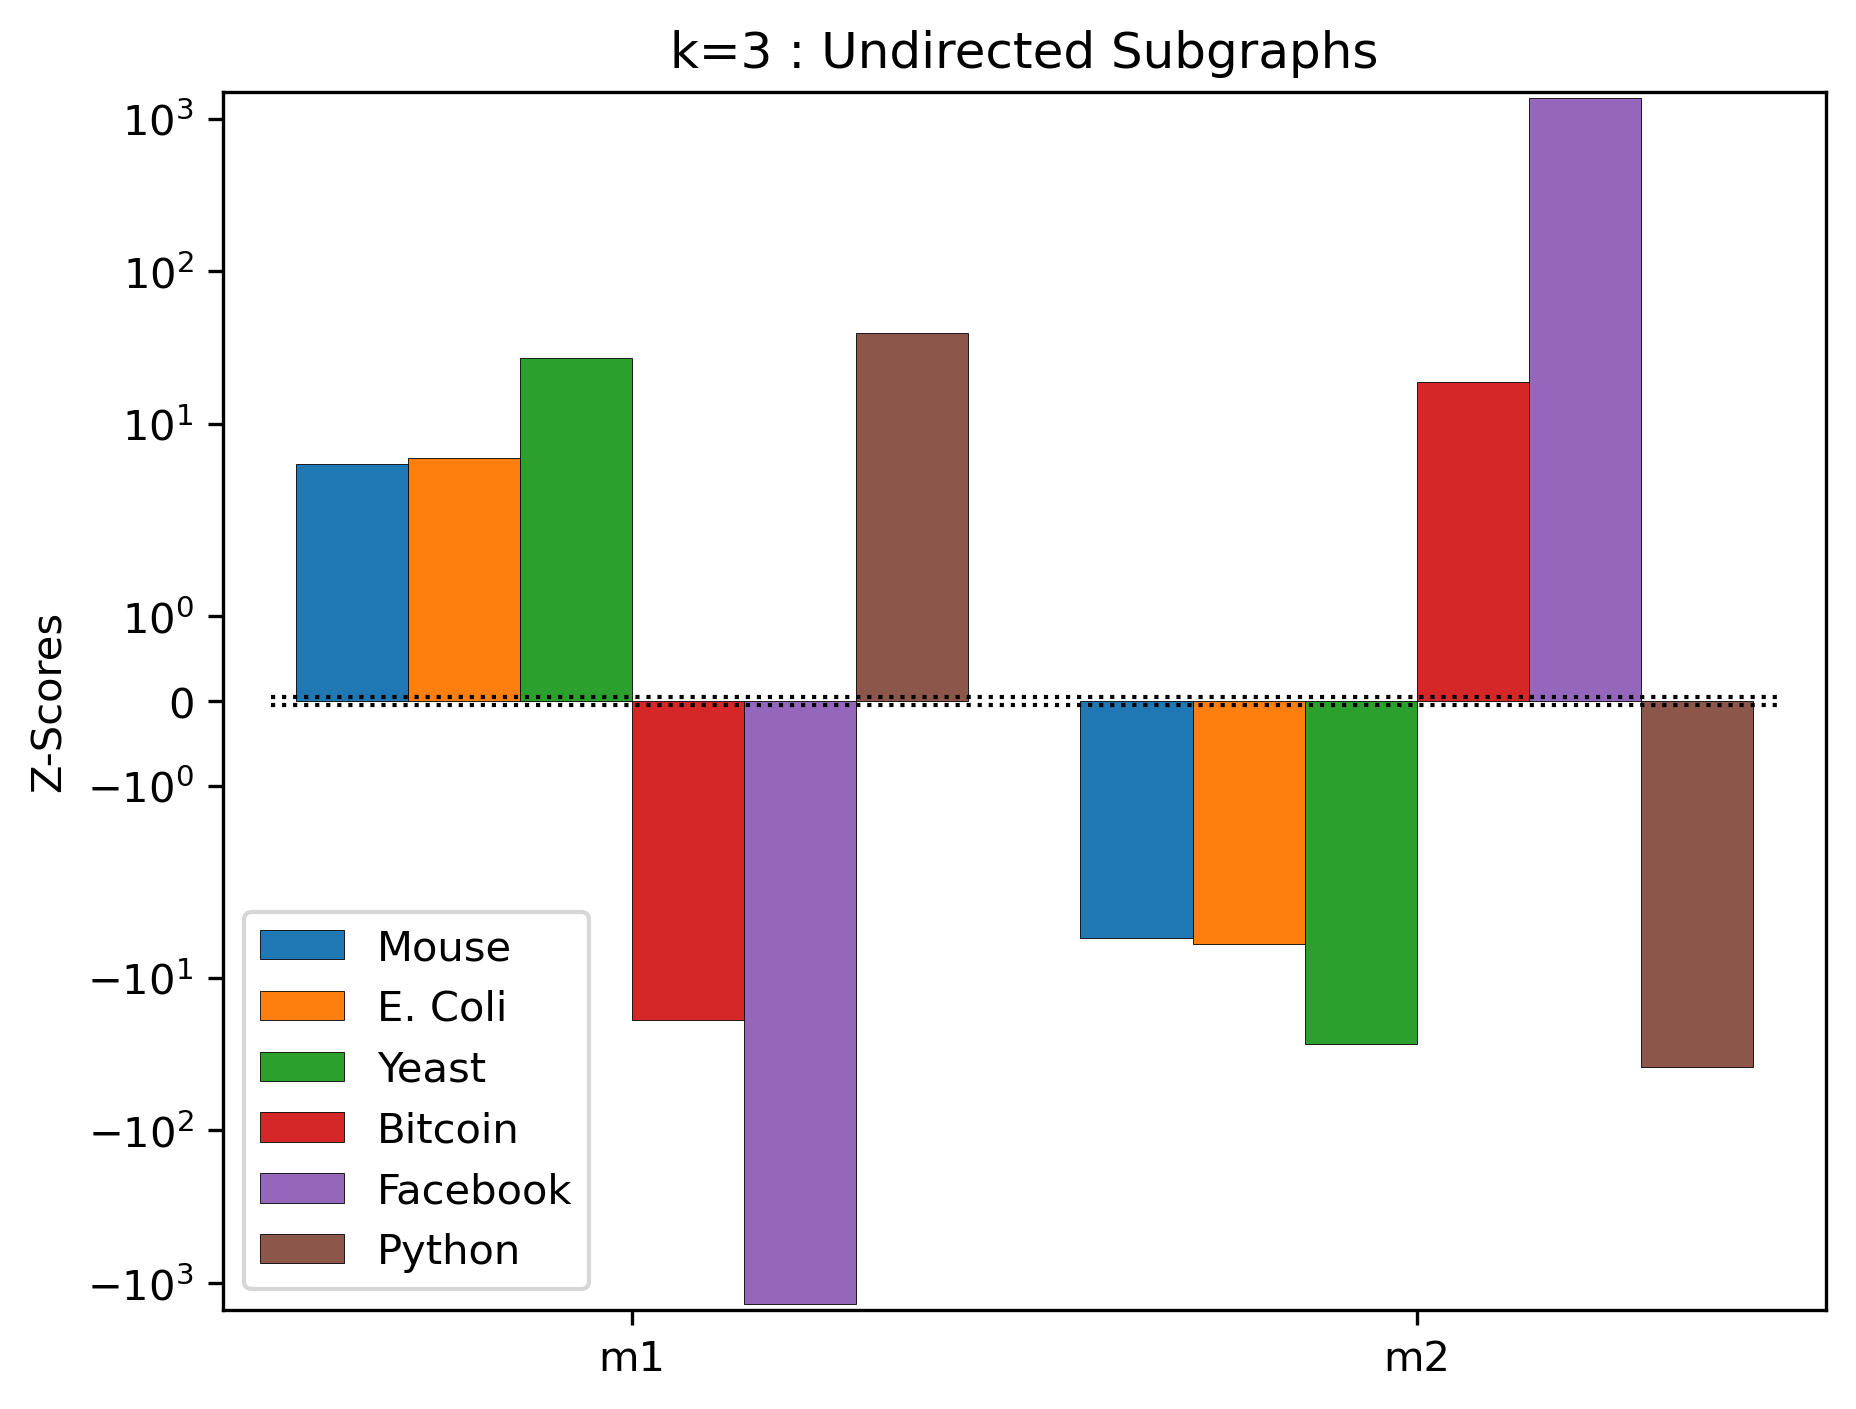

In [147]:
# UNDIRECTED MOTIFS OF SIZE 3 - CONFIGURATION
k_motif_size = 3
k_key = "3"
tag = "undirected"

global_list = list()
max_list = list()
max_size = 0
max_name = ""
# FIND BIGGER MOTIF LIST
data_filenames = ["mouse_vc","ecoli2k","yeast8k","bc","fbego2","pydep2"]
for a_dataset in data_filenames:
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_size = len(curr_list)
    if curr_size > max_size:
        max_list = curr_list
        max_name = a_dataset
        max_size = curr_size
global_list = max_list
# ADD MISSING IF ANY
for a_dataset in data_filenames:
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    for a_motif in curr_list:
        if motif_list_contains(global_list,a_motif) < 0:
            print(f"found missing motif from {a_dataset}")
            global_list.append(a_motif)

# EXPAND RESULTS AND PLOT
normalize = False

n = np.arange(len(global_list))
labels = list()
for i in range(1,len(global_list)+1):
    labels += [f"m{i}"]
fig, ax = plt.subplots()
n_bars = len(data_filenames)
width = 1.0/(n_bars+1)
off = 0 - (width*(n_bars-1)/2)
for (a_dataset,a_name) in zip(data_filenames,names):
    # if a_dataset == "fbego2":
    #     continue
    exp_results = [0] * len(global_list)
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]
    exp_labels = [0] * len(global_list)
    max_val = 0
    for b in curr_results:
        if abs(b) > max_val:
            max_val = abs(b)
    for j in range(0,len(curr_list)):
        global_index = motif_list_contains(global_list,curr_list[j])
        if normalize:
            exp_results[global_index] = curr_results[j]/max_val if max_val > 1 else curr_results[j]
        else:
            exp_results[global_index] = curr_results[j]
        exp_labels[global_index] = curr_results[j]
    r = ax.bar(n+off,exp_results,align="center",width=width,edgecolor="black",linewidth=0.2,label=a_name)
    off = off + width
ax.set_ylabel('Z-Scores')
ax.set_title('k=3 : Undirected Subgraphs')
ax.set_xticks(n, labels)
ax.axhline(y=0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.axhline(y=-0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.legend()
fig.tight_layout()
plt.yscale("symlog")
plt.show()
for g,mane in zip(global_list,n):
    gt.graph_draw(g,output_size=(200,200),bg_color="white",output=f"./undirected/m{mane+1}.png")

### Directed Motifs of Size 4

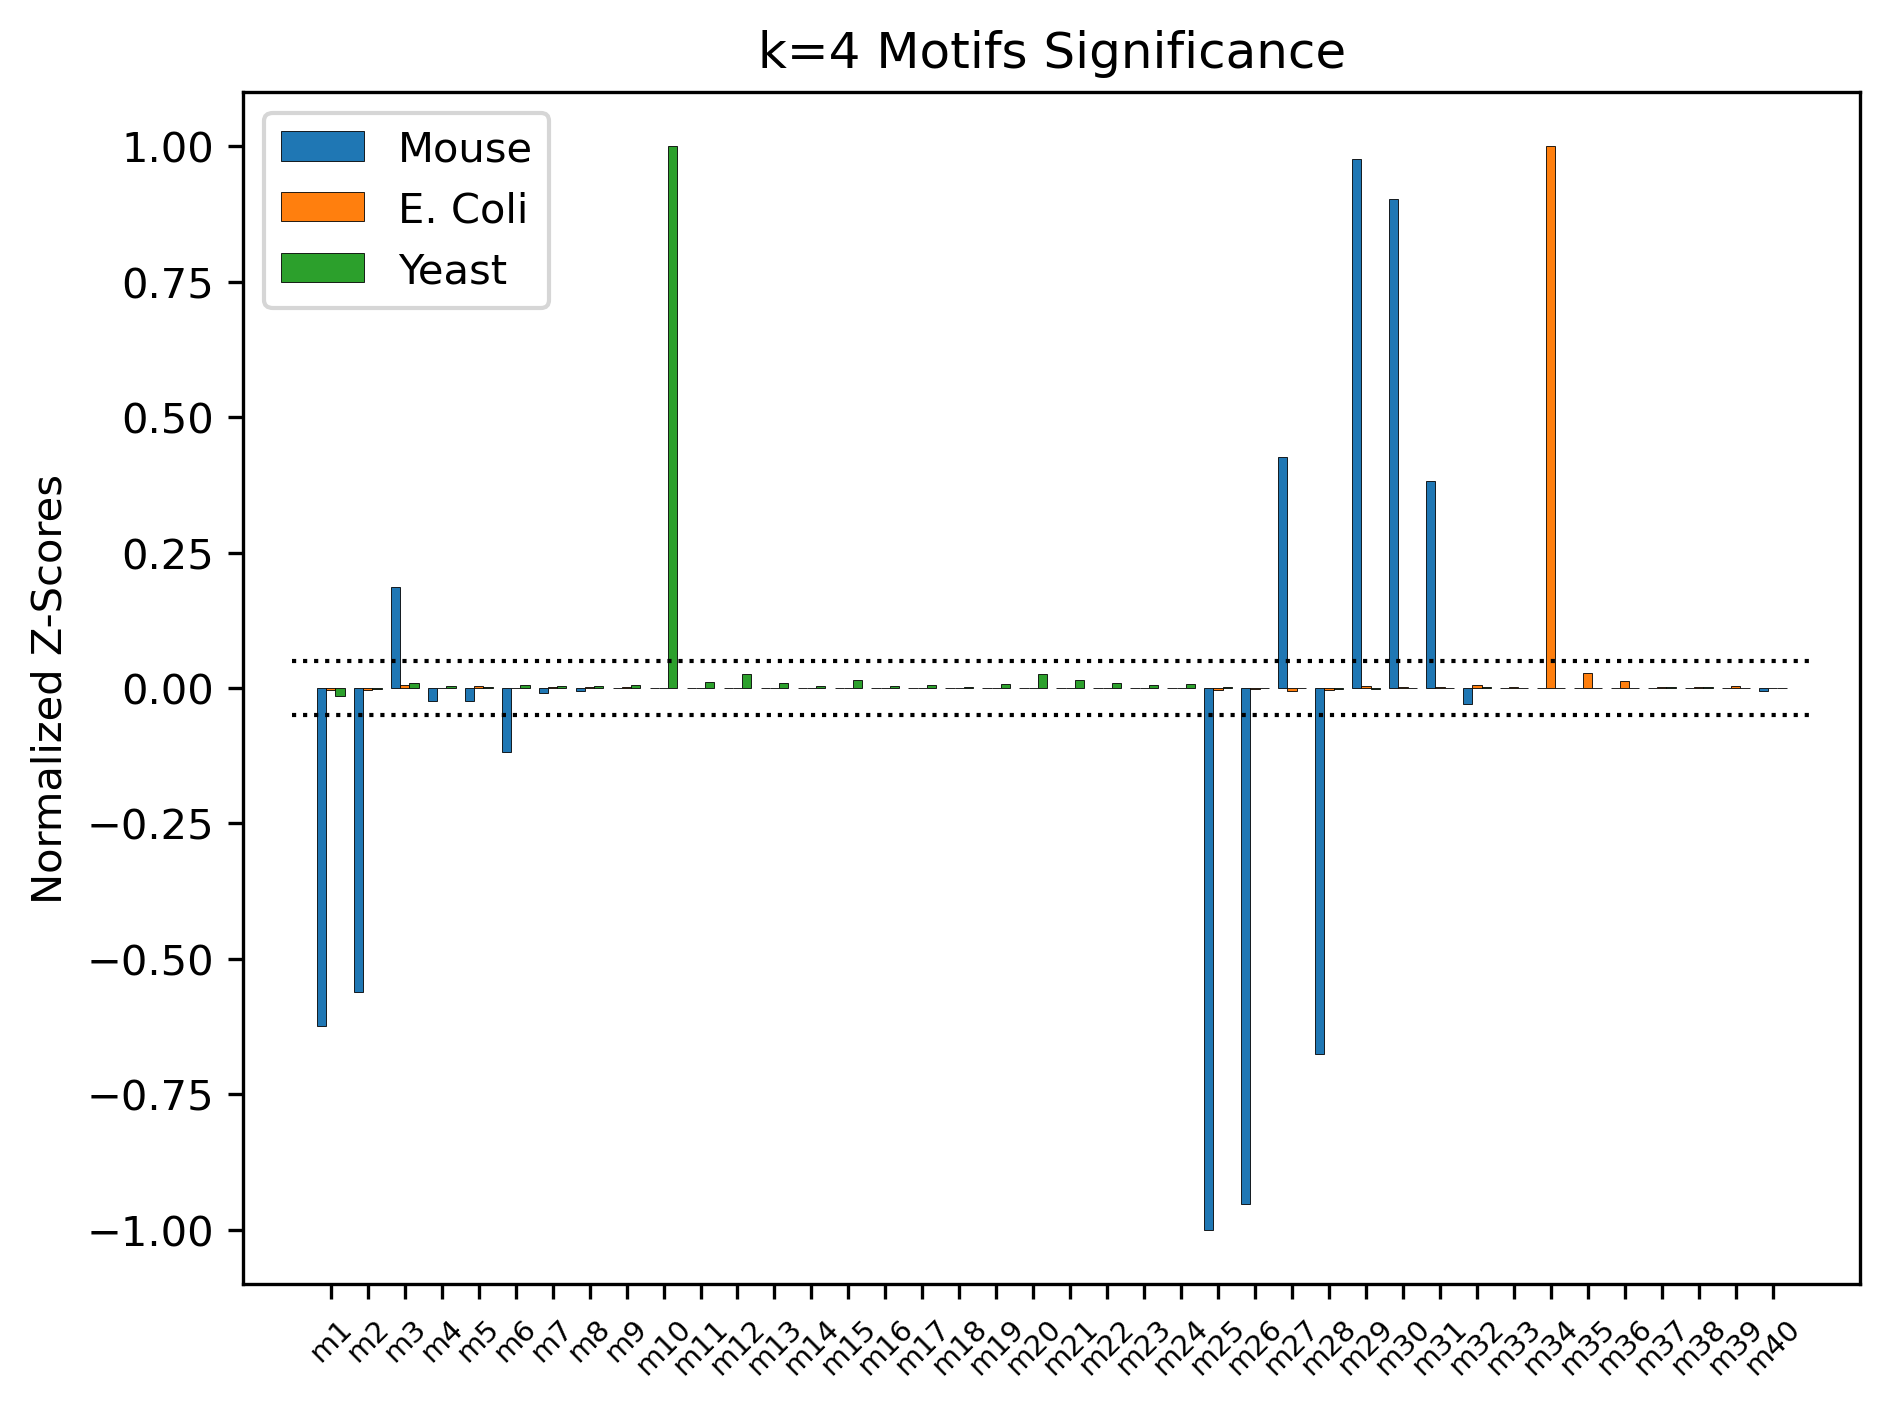

In [104]:
# DIRECTED MOTIFS OF SIZE 4 - CONFIGURATION
k_motif_size = 4
k_key = "4"
tag = "directed"
old_data_filenames = data_filenames
data_filenames = data_filenames[0:3]

global_list = list()
max_list = list()
max_size = 0
max_name = ""
# FIND BIGGER MOTIF LIST
for a_dataset in data_filenames:
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]
for a_dataset in data_filenames:
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_size = len(curr_list)
    if curr_size > max_size:
        max_list = curr_list
        max_name = a_dataset
        max_size = curr_size

# global_list = max_list
for i,motif in enumerate(max_list):
    if(abs(big_map[max_name][k_key][tag]["results"][i]) > 3):
        global_list.append(motif)
# ADD MISSING IF ANY
for a_dataset in data_filenames:
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]
    for i,a_motif in enumerate(curr_list):
        if(abs(big_map[a_dataset][k_key][tag]["results"][i]) > 3):
            if motif_list_contains(global_list,a_motif) < 0:
                # print(f"found missing motif from {a_dataset}")
                global_list.append(a_motif)

# EXPAND RESULTS AND PLOT
normalize = True

n = np.arange(len(global_list))
labels = list()
for i in range(1,len(global_list)+1):
    labels += [f"m{i}"]
fig, ax = plt.subplots()
n_bars = len(data_filenames)
width = 1.0/(n_bars+1)
off = 0 - (width*(n_bars-1)/2)
for (a_dataset,a_name) in zip(data_filenames,names):
    if a_dataset == "fbego2":
        continue
    exp_results = [0] * len(global_list)
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]
    exp_labels = [0] * len(global_list)
    max_val = 0
    for b in curr_results:
        if abs(b) > max_val:
            max_val = abs(b)
    for j in range(0,len(curr_list)):
        global_index = motif_list_contains(global_list,curr_list[j])
        if normalize:
            exp_results[global_index] = curr_results[j]/max_val if max_val > 1 else curr_results[j]
        else:
            exp_results[global_index] = curr_results[j]
        exp_labels[global_index] = curr_results[j]
    r = ax.bar(n+off,exp_results,align="center",width=width,edgecolor="black",linewidth=0.2,label=a_name)
    # ax.bar_label(r,labels= exp_labels,fmt='%.1f',padding=2.5)
    off = off + width
ax.set_ylabel('Normalized Z-Scores')
ax.set_title('k=4 Motifs Significance')
ax.set_xticks(n, labels,fontsize="x-small",rotation=45.0)
ax.axhline(y=0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.axhline(y=-0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.legend()
fig.tight_layout()
plt.show()
for g,mane in zip(global_list,n):
    gt.graph_draw(g,output_size=(200,200),bg_color="white",output=f"./configuration_dir_3//m{mane+1}.png")

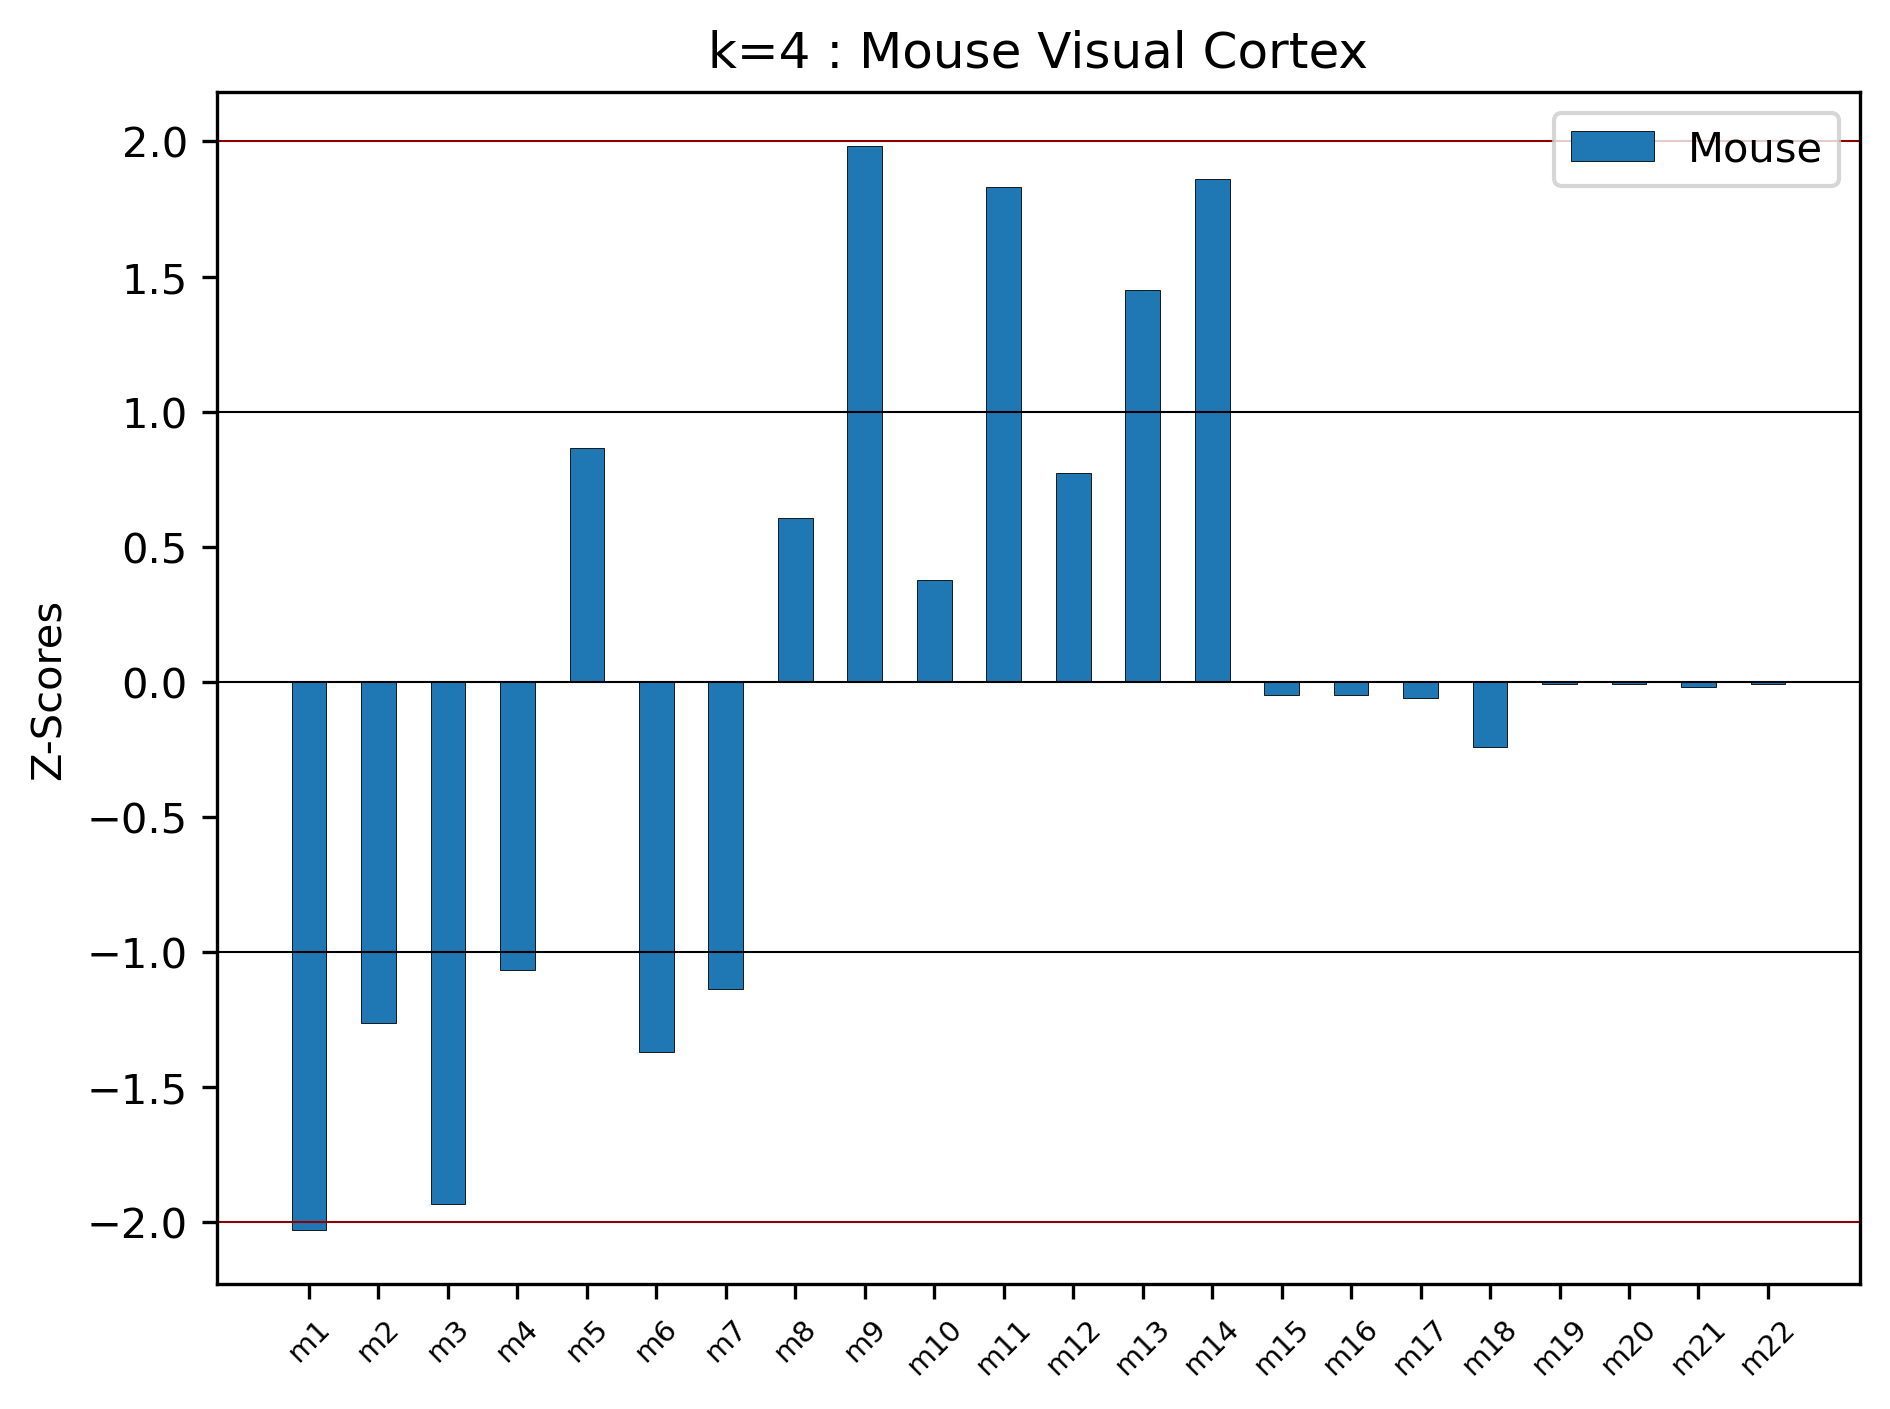

In [141]:
# DIRECTED MOTIFS OF SIZE 3 - CONFIGURATION
k_motif_size = 4
k_key = "4"
tag = "directed"
old_data_filenames = data_filenames
data_filenames = data_filenames[0:3]

global_list = list()
max_list = list()
max_size = 0
max_name = ""
# FIND BIGGER MOTIF LIST
# for a_dataset in data_filenames:
#     curr_list = big_map[a_dataset][k_key][tag]["motifs"]
#     curr_results = big_map[a_dataset][k_key][tag]["results"]
for a_dataset in data_filenames:
    if a_dataset!="mouse_vc":
        continue
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_size = len(curr_list)
    if curr_size > max_size:
        max_list = curr_list
        max_name = a_dataset
        max_size = curr_size

global_list = max_list
significant = list()
for i,motif in enumerate(max_list):
    if(abs(big_map[max_name][k_key][tag]["results"][i]) > 1):
        significant.append(motif)


# EXPAND RESULTS AND PLOT
normalize = False

a_dataset = "mouse_vc"

n = np.arange(len(global_list))
labels = list()
for i in range(1,len(global_list)+1):
    labels += [f"m{i}"]
fig, ax = plt.subplots()

n_bars = len(["1"])
width = 1.0/(n_bars+1)
off = 0 - (width*(n_bars-1)/2)
for (a_dataset,a_name) in zip(data_filenames,names):
    if a_dataset != "mouse_vc":
        continue
    exp_results = [0] * len(global_list)
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]
    exp_labels = [0] * len(global_list)
    max_val = 0
    for b in curr_results:
        if abs(b) > max_val:
            max_val = abs(b)
    for j in range(0,len(curr_list)):
        global_index = motif_list_contains(global_list,curr_list[j])
        if global_index < 0:
            print(f"Motif {curr_list[j]} not in global list, j={global_index}")
            continue
        if normalize:
            exp_results[global_index] = curr_results[j]/max_val if max_val > 1 else curr_results[j]
        else:
            exp_results[global_index] = curr_results[j]
        exp_labels[global_index] = curr_results[j]
    r = ax.bar(n+off,exp_results,align="center",width=width,edgecolor="black",linewidth=0.2,label=a_name)
    # ax.bar_label(r,labels= exp_labels,fmt='%.1f',padding=2.5)
    off = off + width
ax.set_ylabel('Z-Scores')
ax.set_title('k=4 : Mouse Visual Cortex')
ax.set_xticks(n, labels,fontsize="x-small",rotation=45.0)
if normalize:
    ax.axhline(y=0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
    ax.axhline(y=-0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.axhline(y=0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=1.0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=-1.0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=2.0,color="darkred",linestyle="solid",linewidth=0.5)
ax.axhline(y=-2.0,color="darkred",linestyle="solid",linewidth=0.5)
ax.legend()
fig.tight_layout()
plt.show()
for g,mane in zip(global_list,n):
    gt.graph_draw(g,output_size=(200,200),bg_color="white",output=f"./plots_mouse_vc/m{mane+1}.png")

28
23 subgraphs with zscore > 3


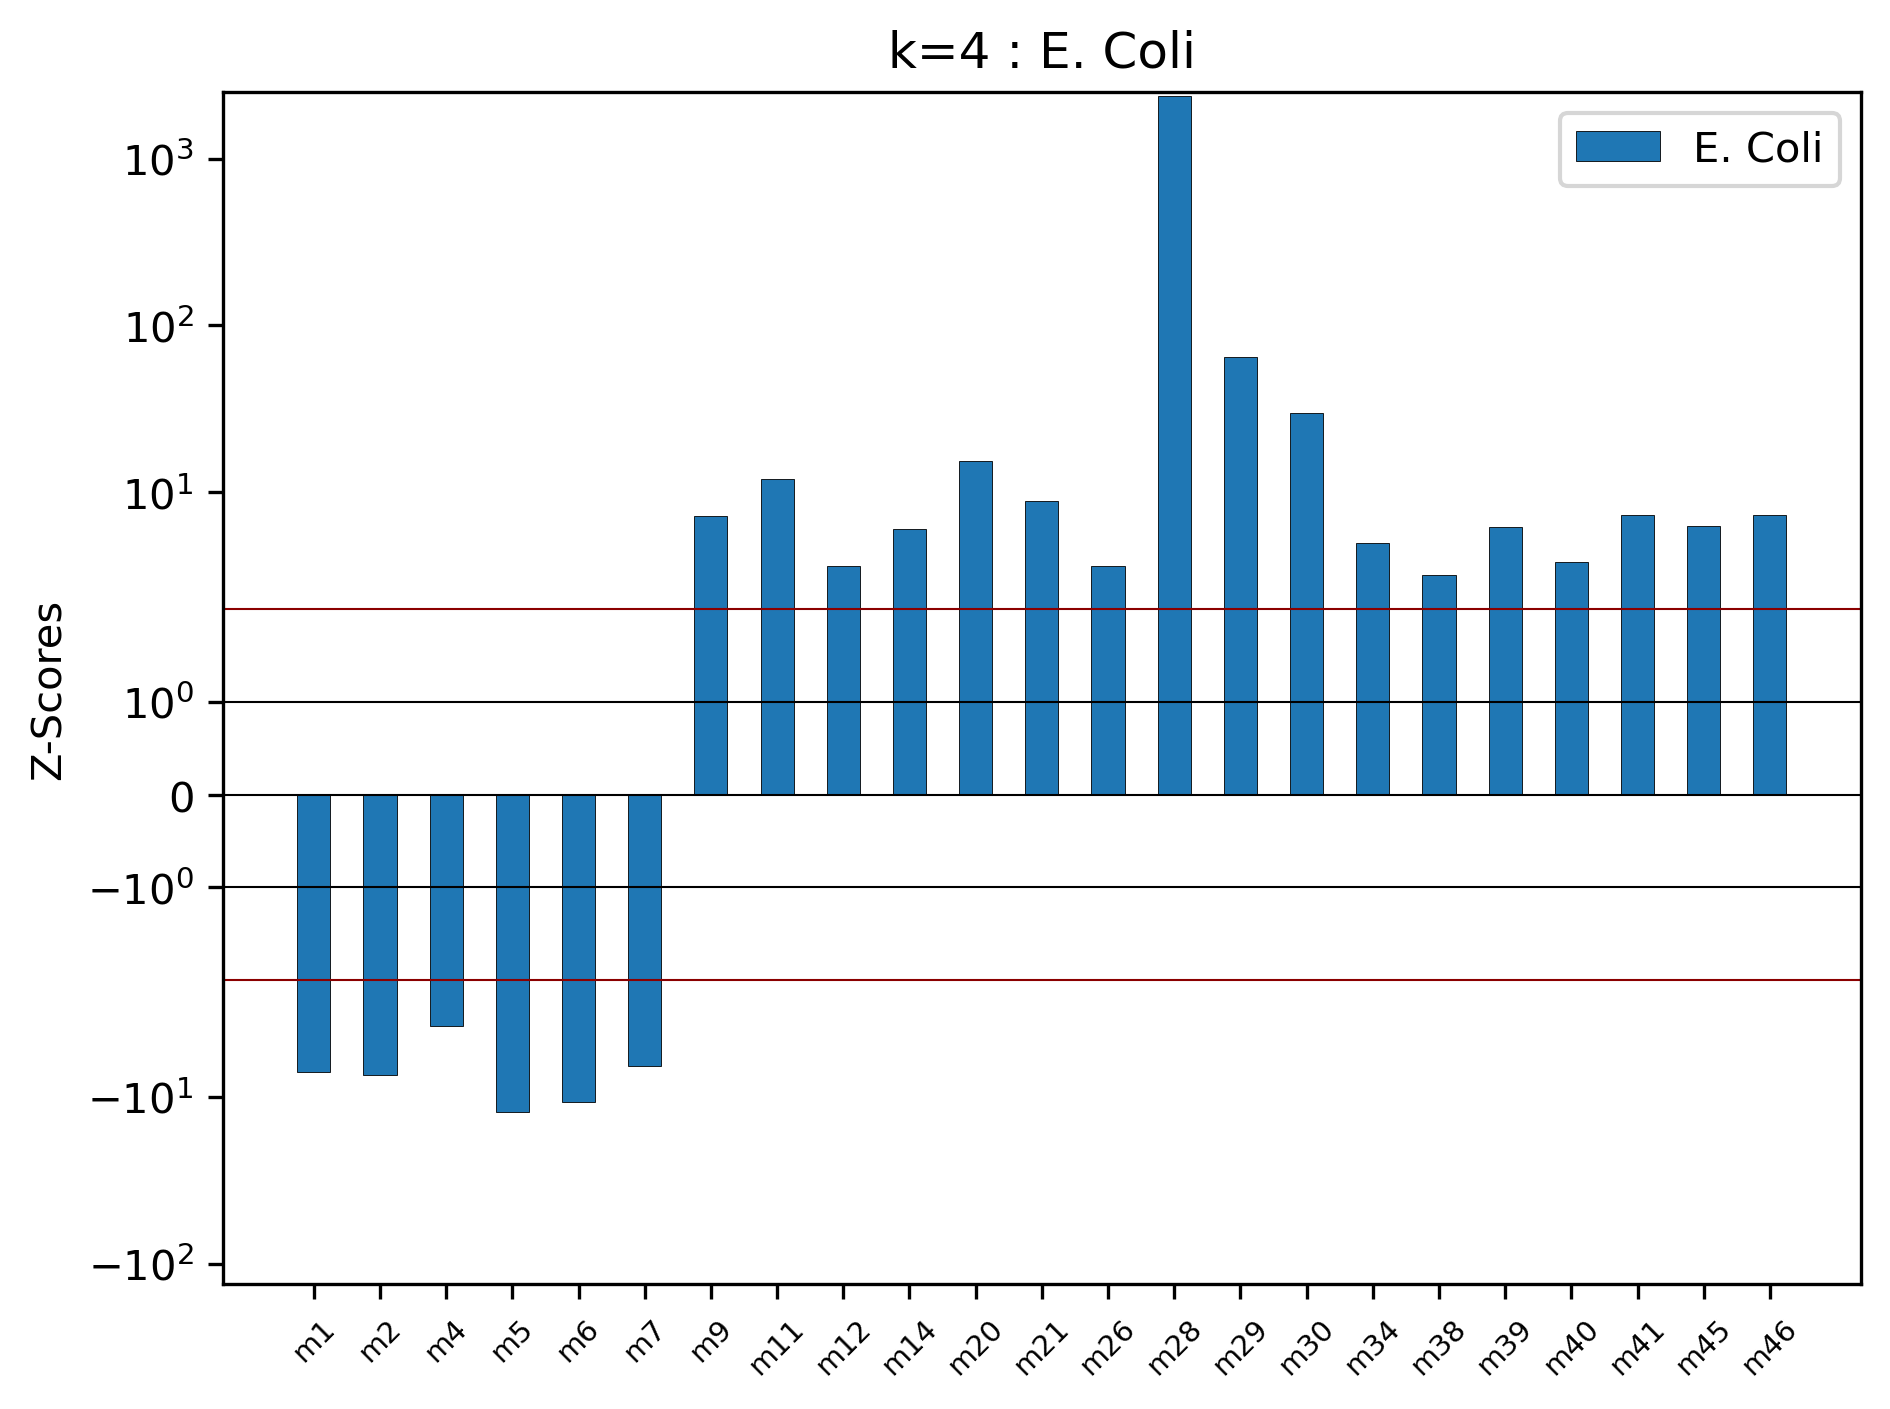

In [151]:
# DIRECTED MOTIFS OF SIZE 4 - E. COLI
k_motif_size = 4
k_key = "4"
tag = "directed"
target = "ecoli2k"
old_data_filenames = data_filenames
data_filenames = data_filenames[0:3]

global_list = list()
max_list = list()
max_size = 0
max_name = ""

for a_dataset in data_filenames:
    if a_dataset!=target:
        continue
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_size = len(curr_list)
    if curr_size > max_size:
        max_list = curr_list
        max_name = a_dataset
        max_size = curr_size

global_list = max_list

filter_results = True
filter_thresh = 3

significant = list()
significant_labels = list()
for i,motif in enumerate(max_list):
    if(abs(big_map[max_name][k_key][tag]["results"][i]) > filter_thresh):
        significant.append(motif)
        significant_labels.append(f"m{i+1}")
        if(abs(big_map[max_name][k_key][tag]["results"][i])>200):
            print(i+1)
print(f"{len(significant)} subgraphs with zscore > 3")

# EXPAND RESULTS AND PLOT
normalize = False

l = np.arange(len(significant))

fig, ax = plt.subplots()

n_bars = len(["1"])
width = 1.0/(n_bars+1)
off = 0 - (width*(n_bars-1)/2)
for (a_dataset,a_name) in zip(data_filenames,names):
    if a_dataset != target:
        continue
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]

    significant_results = [0] * len(significant)

    for j in range(0,len(curr_list)):
        sign_index = motif_list_contains(significant,curr_list[j])
        if sign_index  >= 0:
            significant_results[sign_index] = curr_results[j]
    r = ax.bar(l+off,significant_results,align="center",width=width,edgecolor="black",linewidth=0.2,label=a_name)
    off = off + width
ax.set_ylabel('Z-Scores')
ax.set_title('k=4 : E. Coli')
ax.set_xticks(l, significant_labels,fontsize="x-small",rotation=45.0)
if normalize:
    ax.axhline(y=0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
    ax.axhline(y=-0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.axhline(y=0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=1.0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=-1.0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=2.0,color="darkred",linestyle="solid",linewidth=0.5)
ax.axhline(y=-2.0,color="darkred",linestyle="solid",linewidth=0.5)
ax.legend()
fig.tight_layout()
plt.yscale("symlog")
plt.show()
for g,mane in zip(global_list,n):
    gt.graph_draw(g,output_size=(200,200),bg_color="white",output=f"./plots_ecoli/m{mane+1}.png")

61
24 subgraphs with zscore > 3


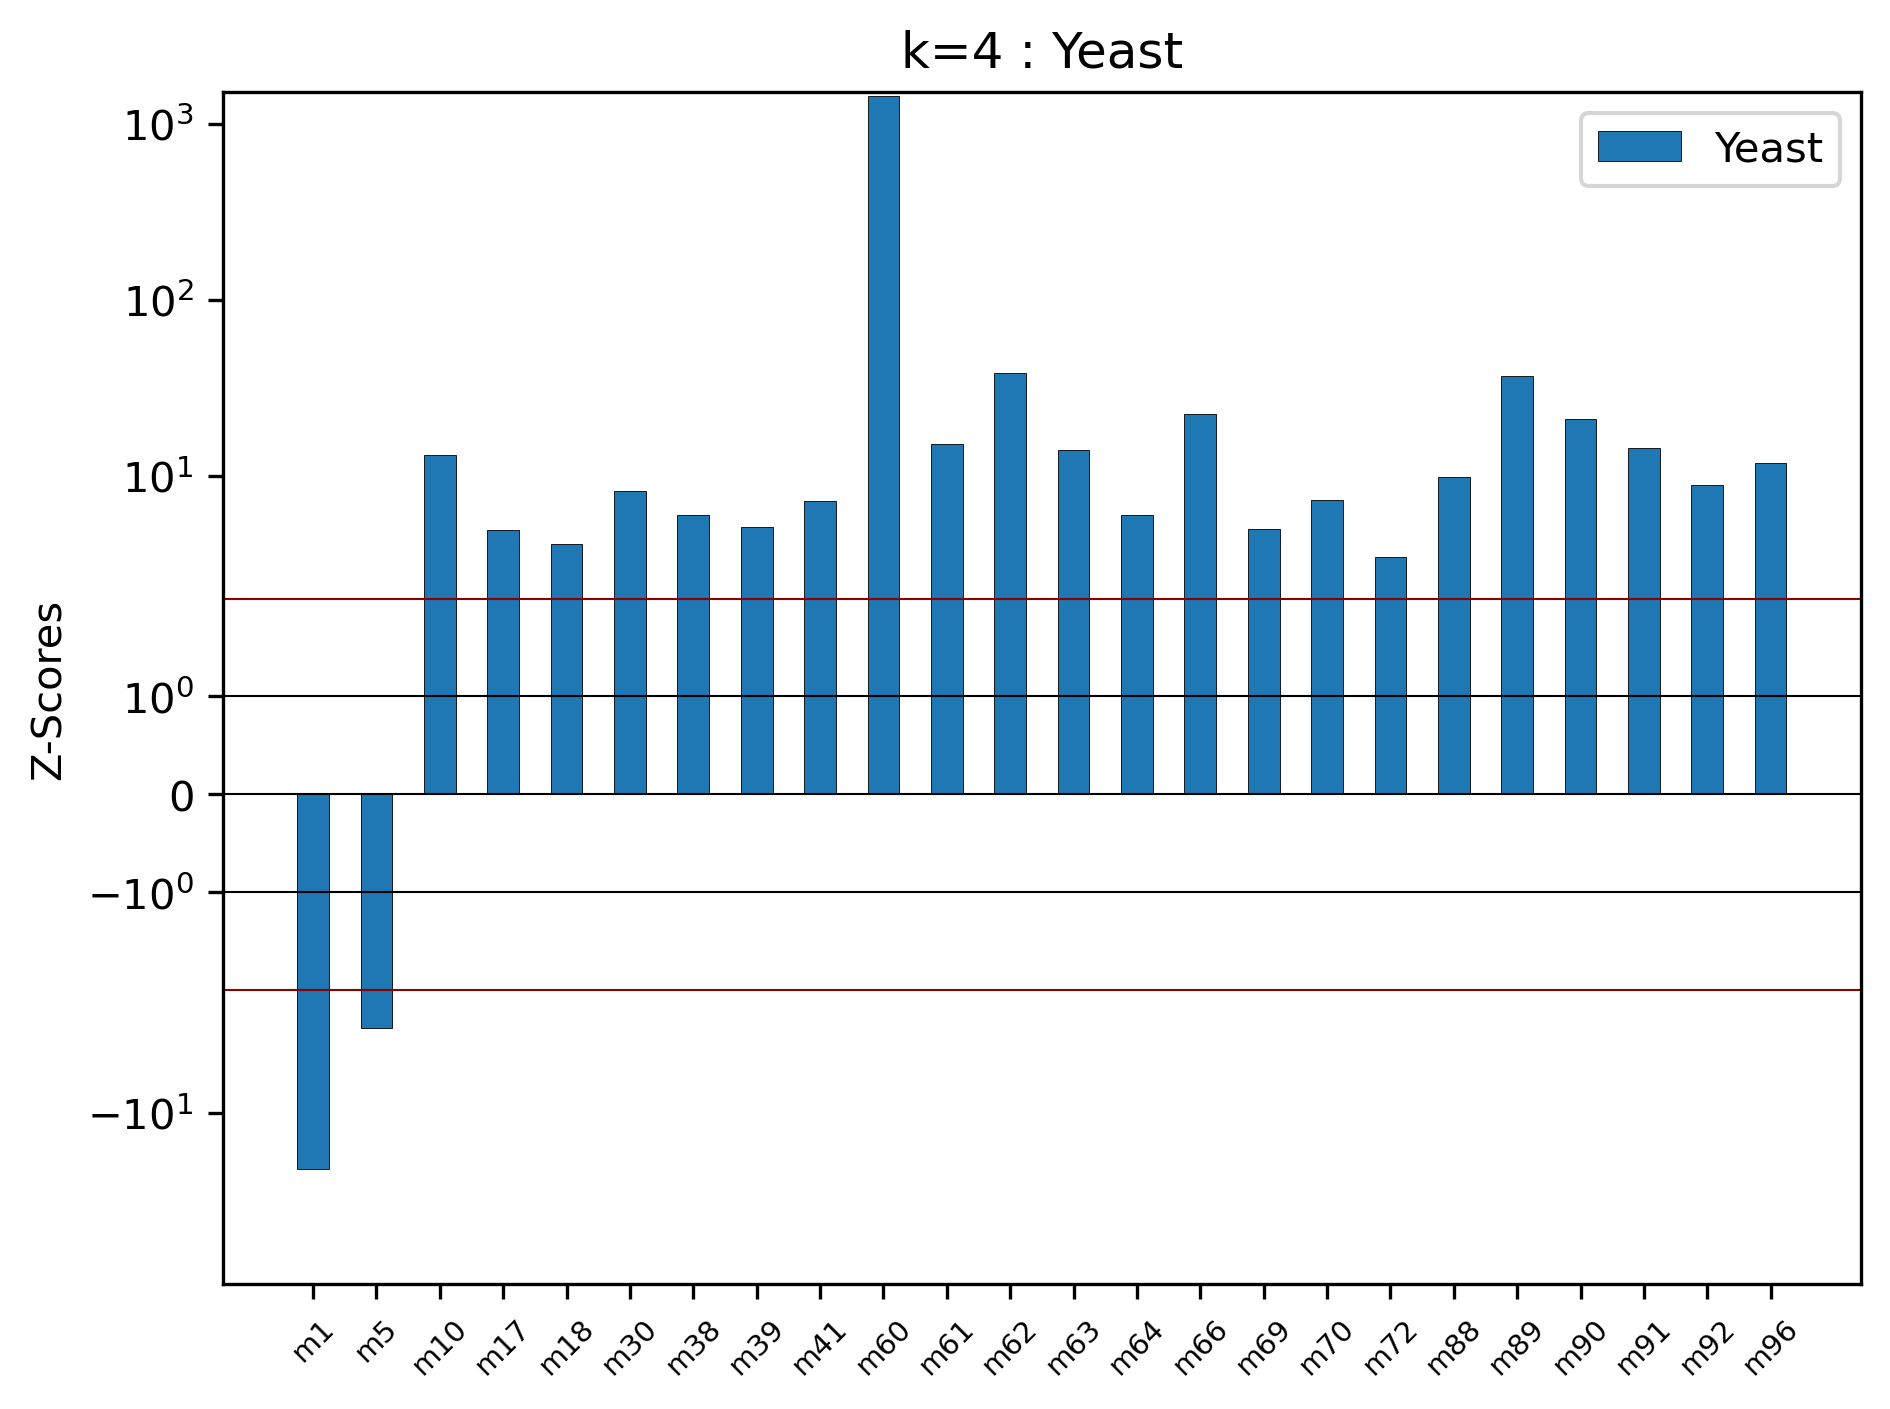

In [153]:
# DIRECTED MOTIFS OF SIZE 3 - CONFIGURATION
k_motif_size = 4
k_key = "4"
tag = "directed"
target = "yeast8k"
old_data_filenames = data_filenames
data_filenames = data_filenames[0:3]

global_list = list()
max_list = list()
max_size = 0
max_name = ""
for a_dataset in data_filenames:
    if a_dataset!=target:
        continue
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_size = len(curr_list)
    if curr_size > max_size:
        max_list = curr_list
        max_name = a_dataset
        max_size = curr_size

global_list = max_list

filter_results = True
filter_thresh = 3

significant = list()
significant_labels = list()
for i,motif in enumerate(max_list):
    if(abs(big_map[max_name][k_key][tag]["results"][i]) > filter_thresh):
        significant.append(motif)
        significant_labels.append(f"m{i}")
        if(abs(big_map[max_name][k_key][tag]["results"][i])>200):
            print(i+1)
print(f"{len(significant)} subgraphs with zscore > 3")

# EXPAND RESULTS AND PLOT
normalize = False

l = np.arange(len(significant))
fig, ax = plt.subplots()

n_bars = len(["1"])
width = 1.0/(n_bars+1)
off = 0 - (width*(n_bars-1)/2)
for (a_dataset,a_name) in zip(data_filenames,names):
    if a_dataset != target:
        continue
    curr_list = big_map[a_dataset][k_key][tag]["motifs"]
    curr_results = big_map[a_dataset][k_key][tag]["results"]
    significant_results = [0] * len(significant)
    for j in range(0,len(curr_list)):
        sign_index = motif_list_contains(significant,curr_list[j])
        if sign_index  >= 0:
            significant_results[sign_index] = curr_results[j]
    r = ax.bar(l+off,significant_results,align="center",width=width,edgecolor="black",linewidth=0.2,label=a_name)
    off = off + width
ax.set_ylabel('Z-Scores')
ax.set_title('k=4 : Yeast')
ax.set_xticks(l, significant_labels,fontsize="x-small",rotation=45.0)
if normalize:
    ax.axhline(y=0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
    ax.axhline(y=-0.05,linestyle="dotted",linewidth=1,color = "black", xmin=0.03,xmax=0.97)
ax.axhline(y=0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=1.0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=-1.0,color="black",linestyle="solid",linewidth=0.5)
ax.axhline(y=2.0,color="darkred",linestyle="solid",linewidth=0.5)
ax.axhline(y=-2.0,color="darkred",linestyle="solid",linewidth=0.5)
ax.legend()
fig.tight_layout()
plt.yscale("symlog")
plt.show()
for g,mane in zip(global_list,n):
    gt.graph_draw(g,output_size=(200,200),bg_color="white",output=f"./plots_yeast/m{mane+1}.png")